In [1]:
using LightGraphs, Distributions

In [6]:
dene = Exponential()
trans_rate(b, con, energ, grafo) = [exp(-b*energ[j])/con for i in vertices(grafo), j in vertices(grafo)]
ipr(eigenvector) = sum(eigenvector.^4)/(sum(eigenvector.^2))^2.

ipr (generic function with 1 method)

In [35]:
c = 999
n_vertices = 1000
ensemble = 10

10

In [36]:
T = 2.5
beta = 1/T

0.4

In [37]:
L = random_regular_graph(n_vertices,c)
adj = adjacency_matrix(L)
energias = rand(dene,nv(L))
rates = trans_rate(beta, c, energias, L);
M = rates.*adj;
for i in vertices(L)
    M[i,i] = -sum(M[:,i])
end
p_eq =  exp.(beta*energias)
p_eq /= sum(p_eq)
p_inv = p_eq.^(-1/2)
p_dir = p_eq.^(1/2)
Ms = diagm(p_inv)*M*diagm(p_dir)
a,eig_vectors = eigs(Ms, which = :LM, nev= n_vertices-1)
I2 = [ipr(eig_vectors[:,i]) for i in 1:n_vertices-2]

for k in 1:ensemble-1
    L = random_regular_graph(n_vertices,c)
    adj = adjacency_matrix(L)
    energias = rand(dene,nv(L))
    rates = trans_rate(beta, c, energias, L);
    M = rates.*adj;
    for i in vertices(L)
        M[i,i] = -sum(M[:,i])
    end
    p_eq =  exp.(beta*energias)
    p_eq /= sum(p_eq)
    p_inv = p_eq.^(-1/2)
    p_dir = p_eq.^(1/2)
    Ms = diagm(p_inv)*M*diagm(p_dir)
    a,eig_vectors = eigs(Ms, which = :LM, nev= n_vertices-1)
    I2 = hcat(I2, [ipr(eig_vectors[:,i]) for i in 1:n_vertices-2])
end


In [38]:
t2 = [mean(-log.(I2[i,:])./log(n_vertices)) for i in 1:n_vertices-2];
IPR = [mean(I2[i,:]) for i in 1:n_vertices-2];

In [39]:
using Plots

In [40]:
pyplot()

Plots.PyPlotBackend()

In [41]:
using LaTeXStrings

In [42]:
#Plots.scalefontsizes(0.5)

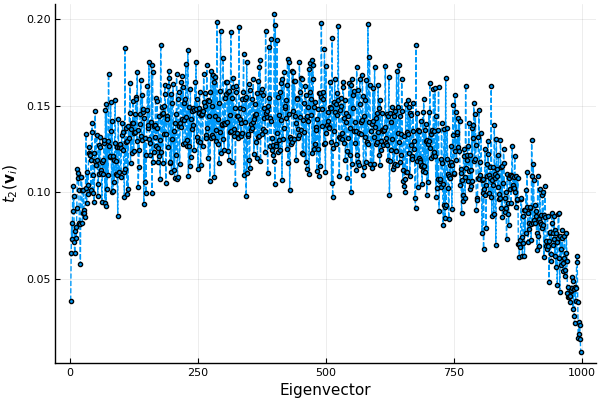

In [45]:
plot(Float64.(t2), xlabel = "Eigenvector", ylabel = L"t_2(\mathbf{v}_i)", label = "", marker = 3, style = :dash )

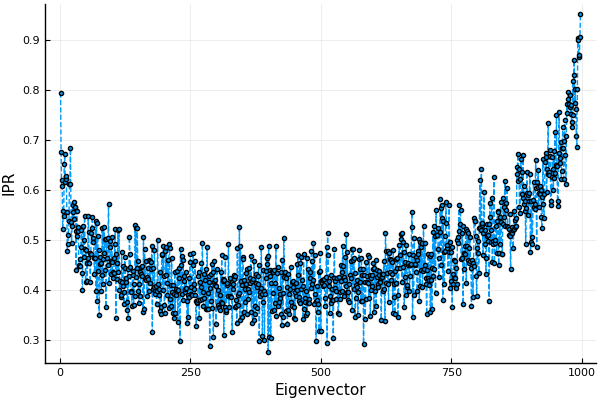

In [46]:
plot(Float64.(IPR), xlabel = "Eigenvector", ylabel = "IPR", label = "", marker = 3, style = :dash )

In [81]:
T = [0.5, 1.5,2.5]

3-element Array{Float64,1}:
 0.5
 1.5
 2.5

In [82]:
ensemble = 2

2

In [83]:
k =1
beta = 1/T[k]
L = random_regular_graph(n_vertices,c)
adj = adjacency_matrix(L)
energias = rand(dene,nv(L))
rates = trans_rate(beta, c, energias, L);
M = rates.*adj;
for i in vertices(L)
    M[i,i] = -sum(M[:,i])
end
p_eq =  exp.(beta*energias)
p_eq /= sum(p_eq)
p_inv = p_eq.^(-1/2)
p_dir = p_eq.^(1/2)
Ms = diagm(p_inv)*M*diagm(p_dir)
eig_values = sort(eigvals(Ms))
temp_lambda = eig_values

for i in 2:ensemble
    L = random_regular_graph(n_vertices,c)
    adj = adjacency_matrix(L)
    energias = rand(dene,nv(L))
    rates = trans_rate(beta, c, energias, L);
    M = rates.*adj;
    for i in vertices(L)
        M[i,i] = -sum(M[:,i])
    end
    p_eq =  exp.(beta*energias)
    p_eq /= sum(p_eq)
    p_inv = p_eq.^(-1/2)
    p_dir = p_eq.^(1/2)
    Ms = diagm(p_inv)*M*diagm(p_dir)
    eig_values = eigvals(Ms)
    temp_lambda = vcat(temp_lambda,eig_values)
end
lambda = copy(temp_lambda)



for k in 2:length(T)
    beta = 1/T[k]
    L = random_regular_graph(n_vertices,c)
    adj = adjacency_matrix(L)
    energias = rand(dene,nv(L))
    rates = trans_rate(beta, c, energias, L);
    M = rates.*adj;
    for i in vertices(L)
        M[i,i] = -sum(M[:,i])
    end
    p_eq =  exp.(beta*energias)
    p_eq /= sum(p_eq)
    p_inv = p_eq.^(-1/2)
    p_dir = p_eq.^(1/2)
    Ms = diagm(p_inv)*M*diagm(p_dir)
    eig_values = eigvals(Ms)
    temp_lambda = eig_values
    
    
    
    for i in 2:ensemble
        L = random_regular_graph(n_vertices,c)
        adj = adjacency_matrix(L)
        energias = rand(dene,nv(L))
        rates = trans_rate(beta, c, energias, L);
        M = rates.*adj;
        for i in vertices(L)
            M[i,i] = -sum(M[:,i])
        end
        p_eq =  exp.(beta*energias)
        p_eq /= sum(p_eq)
        p_inv = p_eq.^(-1/2)
        p_dir = p_eq.^(1/2)
        Ms = diagm(p_inv)*M*diagm(p_dir)
        eig_values = eigvals(Ms)
        temp_lambda = vcat(temp_lambda,eig_values)
    end
    lambda = hcat(lambda, temp_lambda)
end

In [84]:
rho_theor(lambda, T) = T*(-lambda)^(T-1)

rho_theor (generic function with 1 method)

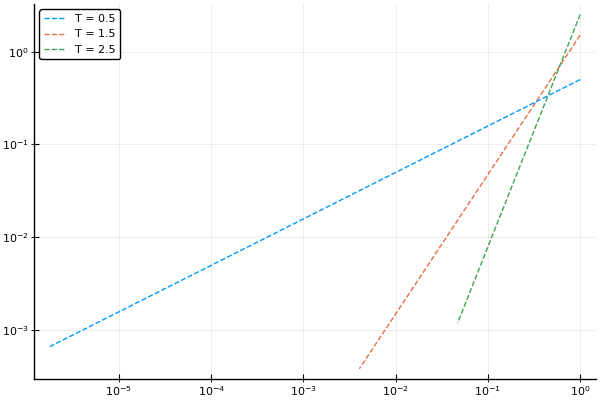

In [85]:
i = 1
a = sort(lambda[:,i])[1:end-ensemble]
plot(-a, -a.*rho_theor.(a,T[i]), style = :dash,  xscale = :log10, yscale = :log10, label = "T = $(T[i])")
for i in 2:length(T)
    a = sort(lambda[:,i])[1:end-ensemble]
    plot!(-a, -a.*rho_theor.(a,T[i]), style = :dash,  xscale = :log10, yscale = :log10, label = "T = $(T[i])")
end
plot!()

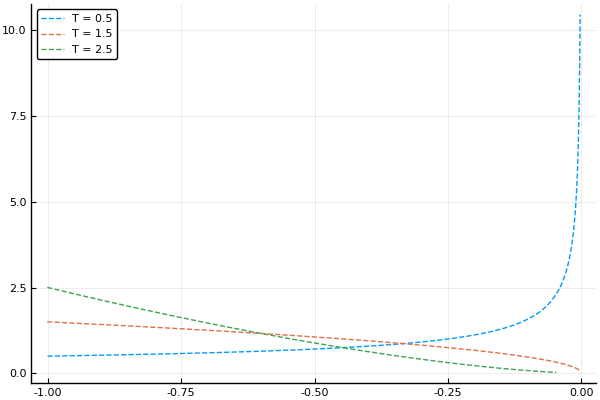

In [91]:
i = 1
a = sort(lambda[:,i])[1:end-100]
plot(a, rho_theor.(a,T[i]), style = :dash, label = "T = $(T[i])")
for i in 2:length(T)
    a = sort(lambda[:,i])[1:end-ensemble]
    plot!(a, rho_theor.(a,T[i]), style = :dash, label = "T = $(T[i])")
end
plot!()

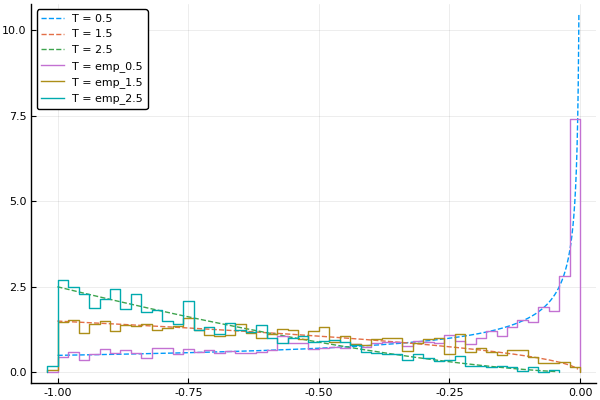

In [92]:
i = 1
a = sort(lambda[:,i])[1:end-ensemble]
stephist!(a, label = "T = emp_$(T[i])", bins = 50, normed = true)
for i in 2:length(T)
    a = sort(lambda[:,i])[1:end-ensemble]
    stephist!(a, label = "T = emp_$(T[i])", bins = 50, normed = true)
end
plot!()